## **K-Means Algorithm for Music Clustering**

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score

In [2]:
# Import data
music_data = pd.read_csv('Audio_files_1000.csv')
music_data

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,All Shook Up,Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
2,Smoke Gets In Your Eyes,The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,NaN,307053,4,5yQ9iMZXGcr5rlO4hoLsP4,https://open.spotify.com/track/5yQ9iMZXGcr5rlO...
4,Dream A Little Dream Of Me,Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,NaN,185067,4,3vFVS2WYHDG4KkWCNecvpn,https://open.spotify.com/track/3vFVS2WYHDG4KkW...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,NaN,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
1436,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,NaN,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
1437,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,NaN,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
1438,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,NaN,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [3]:
music_data['type'].isna().sum()

1440

In [4]:
# Drop columns
music_data = music_data.drop(['type', 'html', 'id', 'artist'], axis=1)
music_data

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,All Shook Up,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
1,I've Got You Under My Skin - Remastered 1998,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
2,Smoke Gets In Your Eyes,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4
3,"What'd I Say, Pt. 1 & 2",0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
4,Dream A Little Dream Of Me,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,"1812 Festival Overture, Op. 49: 1812 Overture,...",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
1436,"Winter Fragments pour ensemble instrumental, s...",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
1437,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
1438,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


In [5]:
# Reindex the music_data
idx = list(music_data['name'])
music_data = music_data.drop('name', axis=1)
music_data.index = idx
music_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
All Shook Up,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
I've Got You Under My Skin - Remastered 1998,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
Smoke Gets In Your Eyes,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4
"What'd I Say, Pt. 1 & 2",0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
Dream A Little Dream Of Me,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


In [6]:
music_data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [7]:
music_data.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [8]:
music_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03,1440.000000
mean,0.538917,0.494241,5.154861,-11.098032,0.663194,0.086273,0.469774,0.188482,0.174391,0.472576,115.249066,2.912083e+05,3.889583
std,0.219193,0.281917,3.540932,6.979107,0.472782,0.086193,0.374637,0.336594,0.146007,0.287807,31.611805,2.280920e+05,0.446937
min,0.059600,0.000020,0.000000,-44.406000,0.000000,0.023200,0.000002,0.000000,0.020700,0.019600,49.689000,6.275800e+04,1.000000
25%,0.386000,0.243000,2.000000,-14.927250,0.000000,0.038400,0.083025,0.000000,0.090700,0.214750,91.014250,1.930300e+05,4.000000
50%,0.562000,0.529500,5.000000,-8.939500,1.000000,0.048200,0.419000,0.000127,0.118000,0.476500,110.008000,2.336965e+05,4.000000
75%,0.710250,0.733000,8.000000,-5.677250,1.000000,0.088825,0.869250,0.159750,0.203000,0.720000,135.587000,3.080625e+05,4.000000
max,0.964000,0.996000,11.000000,1.085000,1.000000,0.576000,0.996000,0.985000,0.985000,0.985000,206.313000,3.815787e+06,5.000000


### Visualize the data

In [9]:
# Columns in dataframe
# 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'

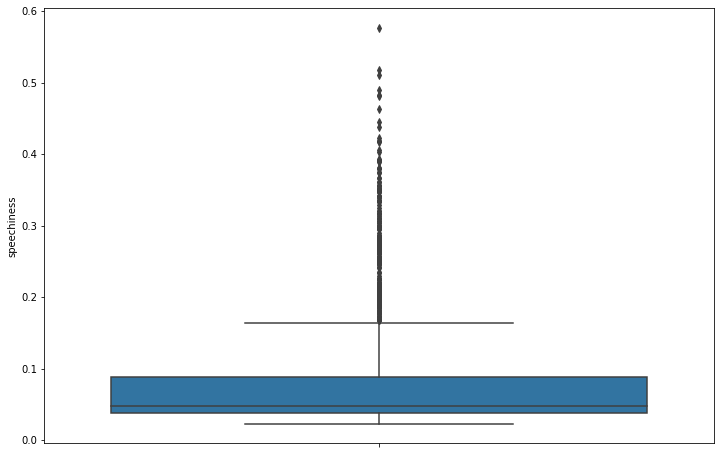

In [10]:
plt.subplots(figsize=(12, 8))
sns.boxplot(data=music_data, y='speechiness')
# plt.xticks(rotation=90)
# plt.ylim(0, 0.5)
plt.show()

In [11]:
# outliers: speechiness, loudness, instrumentalness, liveness, tempo, duration_ms,  

# good data: danceability, energy, acousticness, valence

In [12]:
music_data = music_data.drop('key', axis=1)
music_data

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
All Shook Up,0.6240,0.46800,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
I've Got You Under My Skin - Remastered 1998,0.5850,0.24700,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
Smoke Gets In Your Eyes,0.2900,0.22700,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4
"What'd I Say, Pt. 1 & 2",0.5400,0.68100,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
Dream A Little Dream Of Me,0.4550,0.16700,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.1330,0.02080,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


In [13]:
music_data1 = music_data[['speechiness', 'loudness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']]
music_data2 = music_data.drop(['speechiness', 'loudness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms'], axis=1).reset_index(drop=True)

In [14]:
music_data2

,danceability,energy,mode,acousticness,valence,time_signature
0,0.6240,0.46800,1,0.881,0.9520,4
1,0.5850,0.24700,1,0.452,0.5910,4
2,0.2900,0.22700,1,0.944,0.2240,4
3,0.5400,0.68100,1,0.808,0.7940,4
4,0.4550,0.16700,1,0.918,0.4040,4
...,...,...,...,...,...,...
1435,0.2020,0.06940,1,0.917,0.0655,4
1436,0.1880,0.10100,1,0.855,0.0355,4
1437,0.0596,0.00093,1,0.951,0.0344,3
1438,0.1330,0.02080,1,0.883,0.0591,4


In [15]:
music_data1

,speechiness,loudness,instrumentalness,liveness,tempo,duration_ms
All Shook Up,0.1320,-12.162,0.000006,0.1440,74.139,117080
I've Got You Under My Skin - Remastered 1998,0.0400,-12.612,0.000009,0.1070,127.150,223760
Smoke Gets In Your Eyes,0.0311,-13.060,0.000079,0.6170,114.278,157293
"What'd I Say, Pt. 1 & 2",0.0508,-5.440,0.000000,0.1620,88.385,307053
Dream A Little Dream Of Me,0.0739,-13.613,0.000000,0.1730,76.118,185067
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.0473,-23.390,0.715000,0.0832,87.906,995000
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.0442,-21.873,0.426000,0.0694,83.134,855000
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0434,-42.959,0.969000,0.0772,71.573,238187
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.0419,-29.443,0.505000,0.1110,67.109,314307


#### **Scale the columns with outliers**

In [16]:
music_data1a = pd.DataFrame(RobustScaler(with_centering=False).fit_transform(music_data1))
music_data1a.columns = ['speechiness', 'loudness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']
music_data1a

,speechiness,loudness,instrumentalness,liveness,tempo,duration_ms
0,2.617749,-1.314811,0.000040,1.282280,1.663326,1.017799
1,0.793257,-1.363459,0.000055,0.952805,2.852640,1.945189
2,0.616758,-1.411892,0.000498,5.494212,2.563853,1.367379
3,1.007437,-0.588108,0.000000,1.442565,1.982938,2.669272
4,1.465543,-1.471676,0.000000,1.540516,1.707725,1.608824
...,...,...,...,...,...,...
1435,0.938027,-2.528649,4.475743,0.740873,1.972192,8.649729
1436,0.876549,-2.364649,2.666667,0.617988,1.865131,7.432682
1437,0.860684,-4.644216,6.065728,0.687444,1.605757,2.070606
1438,0.830937,-3.183027,3.161189,0.988424,1.505606,2.732332


In [17]:
music_data1a.describe()

,speechiness,loudness,instrumentalness,liveness,tempo,duration_ms
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,1.710920,-1.199787,1.179855,1.552903,2.585640,2.531531
std,1.709322,0.754498,2.107003,1.300148,0.709218,1.982849
min,0.460089,-4.800649,0.000000,0.184328,1.114784,0.545568
25%,0.761527,-1.613757,0.000000,0.807658,2.041926,1.678048
50%,0.955875,-0.966432,0.000795,1.050757,2.468055,2.031569
75%,1.761527,-0.613757,1.000000,1.807658,3.041926,2.678048
max,11.422905,0.117297,6.165884,8.771149,4.628680,33.171382


In [18]:
music_data1b = pd.DataFrame(RobustScaler(with_centering=True).fit_transform(music_data1))
music_data1b.columns = ['speechiness', 'loudness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']
music_data1b

,speechiness,loudness,instrumentalness,liveness,tempo,duration_ms
0,1.661874,-0.348378,-0.000755,0.231523,-0.804729,-1.013770
1,-0.162618,-0.397027,-0.000740,-0.097952,0.384585,-0.086380
2,-0.339118,-0.445459,-0.000297,4.443455,0.095798,-0.664191
3,0.051562,0.378324,-0.000795,0.391808,-0.485117,0.637702
4,0.509668,-0.505243,-0.000795,0.489760,-0.760330,-0.422746
...,...,...,...,...,...,...
1435,-0.017848,-1.562216,4.474948,-0.309884,-0.495864,6.618160
1436,-0.079326,-1.398216,2.665872,-0.432769,-0.602924,5.401113
1437,-0.095191,-3.677784,6.064933,-0.363313,-0.862298,0.039037
1438,-0.124938,-2.216595,3.160394,-0.062333,-0.962449,0.700763


In [19]:
music_data_combd1 = pd.concat([music_data2, music_data1a], axis=1)
music_data_combd1.index = list(music_data.index)
music_data_combd1

,danceability,energy,mode,acousticness,valence,time_signature,speechiness,loudness,instrumentalness,liveness,tempo,duration_ms
All Shook Up,0.6240,0.46800,1,0.881,0.9520,4,2.617749,-1.314811,0.000040,1.282280,1.663326,1.017799
I've Got You Under My Skin - Remastered 1998,0.5850,0.24700,1,0.452,0.5910,4,0.793257,-1.363459,0.000055,0.952805,2.852640,1.945189
Smoke Gets In Your Eyes,0.2900,0.22700,1,0.944,0.2240,4,0.616758,-1.411892,0.000498,5.494212,2.563853,1.367379
"What'd I Say, Pt. 1 & 2",0.5400,0.68100,1,0.808,0.7940,4,1.007437,-0.588108,0.000000,1.442565,1.982938,2.669272
Dream A Little Dream Of Me,0.4550,0.16700,1,0.918,0.4040,4,1.465543,-1.471676,0.000000,1.540516,1.707725,1.608824
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,1,0.917,0.0655,4,0.938027,-2.528649,4.475743,0.740873,1.972192,8.649729
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,1,0.855,0.0355,4,0.876549,-2.364649,2.666667,0.617988,1.865131,7.432682
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,1,0.951,0.0344,3,0.860684,-4.644216,6.065728,0.687444,1.605757,2.070606
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.1330,0.02080,1,0.883,0.0591,4,0.830937,-3.183027,3.161189,0.988424,1.505606,2.732332


In [20]:
music_data_combd1.describe()

,danceability,energy,mode,acousticness,valence,time_signature,speechiness,loudness,instrumentalness,liveness,tempo,duration_ms
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.538917,0.494241,0.663194,0.469774,0.472576,3.889583,1.710920,-1.199787,1.179855,1.552903,2.585640,2.531531
std,0.219193,0.281917,0.472782,0.374637,0.287807,0.446937,1.709322,0.754498,2.107003,1.300148,0.709218,1.982849
min,0.059600,0.000020,0.000000,0.000002,0.019600,1.000000,0.460089,-4.800649,0.000000,0.184328,1.114784,0.545568
25%,0.386000,0.243000,0.000000,0.083025,0.214750,4.000000,0.761527,-1.613757,0.000000,0.807658,2.041926,1.678048
50%,0.562000,0.529500,1.000000,0.419000,0.476500,4.000000,0.955875,-0.966432,0.000795,1.050757,2.468055,2.031569
75%,0.710250,0.733000,1.000000,0.869250,0.720000,4.000000,1.761527,-0.613757,1.000000,1.807658,3.041926,2.678048
max,0.964000,0.996000,1.000000,0.996000,0.985000,5.000000,11.422905,0.117297,6.165884,8.771149,4.628680,33.171382


In [21]:
music_data_combd2 = pd.concat([music_data2, music_data1b], axis=1)
music_data_combd2.index = list(music_data.index)
music_data_combd2

,danceability,energy,mode,acousticness,valence,time_signature,speechiness,loudness,instrumentalness,liveness,tempo,duration_ms
All Shook Up,0.6240,0.46800,1,0.881,0.9520,4,1.661874,-0.348378,-0.000755,0.231523,-0.804729,-1.013770
I've Got You Under My Skin - Remastered 1998,0.5850,0.24700,1,0.452,0.5910,4,-0.162618,-0.397027,-0.000740,-0.097952,0.384585,-0.086380
Smoke Gets In Your Eyes,0.2900,0.22700,1,0.944,0.2240,4,-0.339118,-0.445459,-0.000297,4.443455,0.095798,-0.664191
"What'd I Say, Pt. 1 & 2",0.5400,0.68100,1,0.808,0.7940,4,0.051562,0.378324,-0.000795,0.391808,-0.485117,0.637702
Dream A Little Dream Of Me,0.4550,0.16700,1,0.918,0.4040,4,0.509668,-0.505243,-0.000795,0.489760,-0.760330,-0.422746
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,1,0.917,0.0655,4,-0.017848,-1.562216,4.474948,-0.309884,-0.495864,6.618160
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,1,0.855,0.0355,4,-0.079326,-1.398216,2.665872,-0.432769,-0.602924,5.401113
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,1,0.951,0.0344,3,-0.095191,-3.677784,6.064933,-0.363313,-0.862298,0.039037
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.1330,0.02080,1,0.883,0.0591,4,-0.124938,-2.216595,3.160394,-0.062333,-0.962449,0.700763


In [22]:
music_data_combd2.describe()

,danceability,energy,mode,acousticness,valence,time_signature,speechiness,loudness,instrumentalness,liveness,tempo,duration_ms
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03,1440.000000,1440.000000,1.440000e+03,1440.000000
mean,0.538917,0.494241,0.663194,0.469774,0.472576,3.889583,0.755045,-2.333548e-01,1.179060,0.502146,1.175845e-01,0.499962
std,0.219193,0.281917,0.472782,0.374637,0.287807,0.446937,1.709322,7.544981e-01,2.107003,1.300148,7.092182e-01,1.982849
min,0.059600,0.000020,0.000000,0.000002,0.019600,1.000000,-0.495786,-3.834216e+00,-0.000795,-0.866429,-1.353271e+00,-1.486002
25%,0.386000,0.243000,0.000000,0.083025,0.214750,4.000000,-0.194348,-6.473243e-01,-0.000795,-0.243099,-4.261292e-01,-0.353522
50%,0.562000,0.529500,1.000000,0.419000,0.476500,4.000000,0.000000,-9.600610e-17,0.000000,0.000000,-1.594048e-16,0.000000
75%,0.710250,0.733000,1.000000,0.869250,0.720000,4.000000,0.805652,3.526757e-01,0.999205,0.756901,5.738708e-01,0.646478
max,0.964000,0.996000,1.000000,0.996000,0.985000,5.000000,10.467030,1.083730e+00,6.165089,7.720392,2.160625e+00,31.139813


#### **Perform K-Means Clustering to Calculate Inertia and Silhouette Scores**

In [23]:
inertia_list1 = []
sil_scores1 = []

for i in range(2, 40):
    kmns = KMeans(n_clusters=i, random_state=10).fit(music_data_combd1)
    inertia_list1.append(round(kmns.inertia_))
    sil_scores1.append(silhouette_score(music_data_combd1, kmns.labels_))

In [24]:
inertia_list2 = []
sil_scores2 = []

for i in range(2, 40):
    kmns = KMeans(n_clusters=i, random_state=10).fit(music_data_combd2)
    inertia_list2.append(round(kmns.inertia_))
    sil_scores2.append(silhouette_score(music_data_combd2, kmns.labels_))

#### **Visualize the Results**

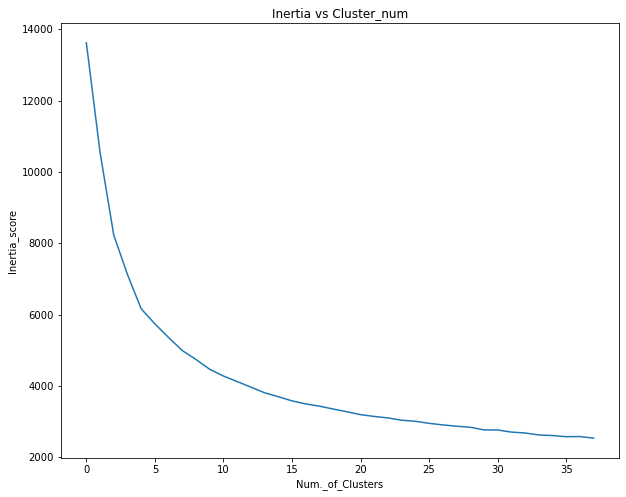

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(range(len(inertia_list1)), inertia_list1)
plt.title('Inertia vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Inertia_score')
plt.show();

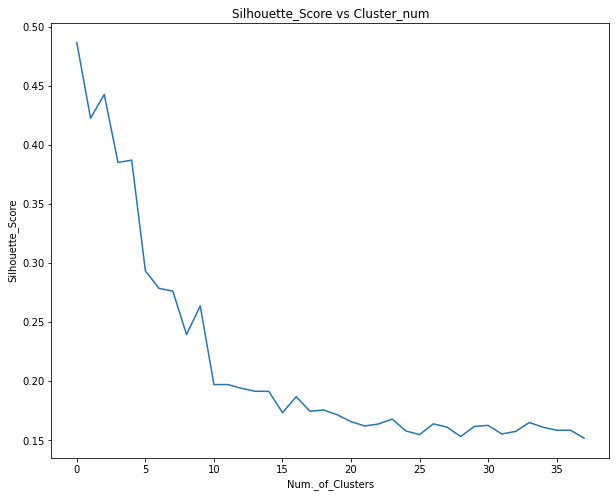

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(range(len(sil_scores1)), sil_scores1)
plt.title('Silhouette_Score vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Silhouette_Score')
plt.show();

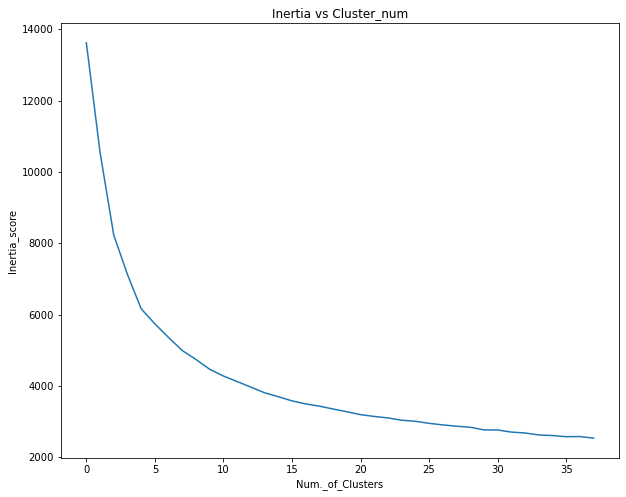

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(range(len(inertia_list2)), inertia_list2)
plt.title('Inertia vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Inertia_score')
plt.show();

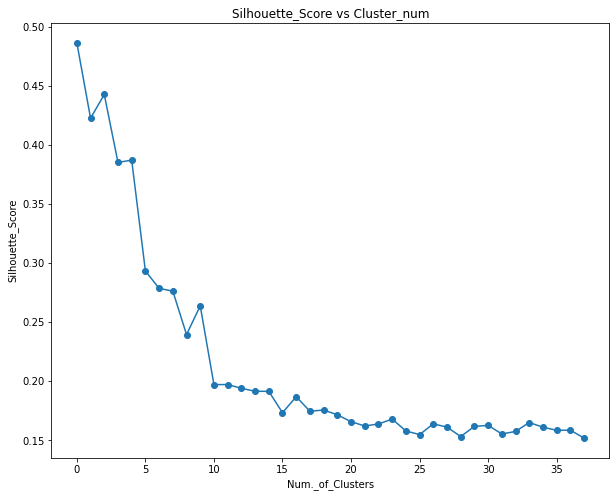

In [28]:
plt.figure(figsize=(10, 8))
plt.plot(range(len(sil_scores2)), sil_scores2, marker='o')
plt.title('Silhouette_Score vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Silhouette_Score')
plt.show();

#### **Using or not using centering on Robust Scaler had no effect on the final outcome.**

#### **Based on the silhouette score, robustScaling achieves optimal clustering of 6, 7 or 9**